In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regresion Lineal
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Evaluar Modelo
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar el dataset
df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [417]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin'], axis=1)

# df.info()
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [418]:
df.dropna(inplace=True)
# df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


In [419]:
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [420]:
df['Sex'] = np.where(df['Sex'] == 'female', 1, 0)
df.describe()

,Survived,Pclass,Sex,Age
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118
std,0.491460,0.838250,0.481921,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,1.000000,0.000000,20.125000
50%,0.000000,2.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


In [421]:
df.columns = ['Sobrevivientes', 'Clase', 'Sexo', 'Edad']

df.describe()

,Sobrevivientes,Clase,Sexo,Edad
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118
std,0.491460,0.838250,0.481921,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,1.000000,0.000000,20.125000
50%,0.000000,2.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


In [422]:
df.to_excel('titanicLimpio.xlsx')

In [423]:
correlacion_matriz = df.corr().abs()
np.fill_diagonal(correlacion_matriz.values, 0)
most_correlacion = correlacion_matriz.unstack().sort_values(ascending=False).drop_duplicates()

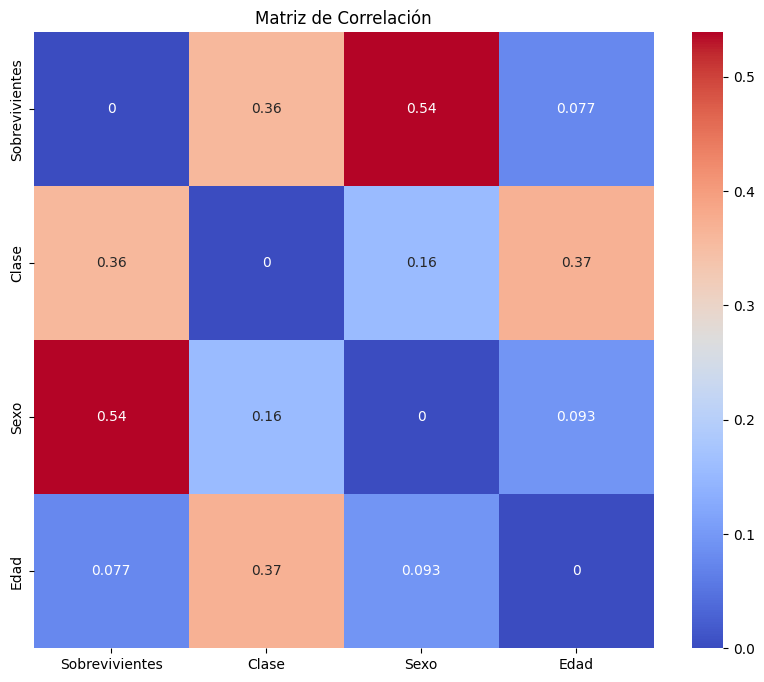

In [424]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [425]:
for (var1, var2), correlacion in most_correlacion.items():
    print(f"Las variables '{var1}' y '{var2}' tienen una correlación en '{correlacion}'")

Las variables 'Sobrevivientes' y 'Sexo' tienen una correlación en '0.5388255930146358'
Las variables 'Clase' y 'Edad' tienen una correlación en '0.36922601531551735'
Las variables 'Sobrevivientes' y 'Clase' tienen una correlación en '0.3596526820868464'
Las variables 'Clase' y 'Sexo' tienen una correlación en '0.15546030092742963'
Las variables 'Sexo' y 'Edad' tienen una correlación en '0.09325357685567738'
Las variables 'Sobrevivientes' y 'Edad' tienen una correlación en '0.07722109457217756'
Las variables 'Sobrevivientes' y 'Sobrevivientes' tienen una correlación en '0.0'


In [426]:
variables=['Sobrevivientes', 'Clase', 'Sexo', 'Edad']

X=df[variables]
y=df['Sobrevivientes']

In [427]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [428]:
#Escalar caracteristicas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [429]:
model = LogisticRegression(max_iter=1000)

In [430]:
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [431]:
y_pred=model.predict(X_test_scaled)


In [432]:
prediccion = accuracy_score(y_test, y_pred)

print('Precición del modelo: %.2f' %prediccion)

Precición del modelo: 1.00


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion")
print(confusion)

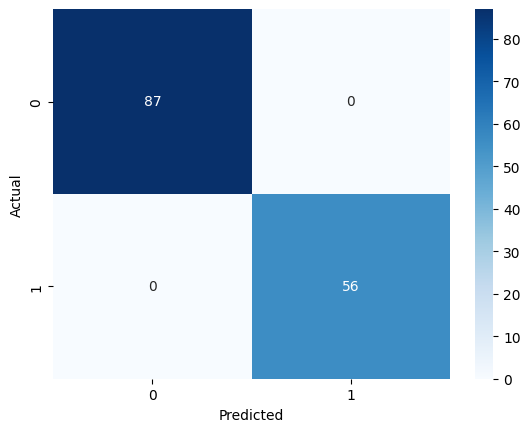

In [433]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matriz, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


EVALUACION ADICIONAL DEL MODELO

In [434]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        56

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

